## Tutorial for loading OCTRON annotation results

This is only useful if you want to use the training (=annotation) data generated in SAM2 directly without training your YOLO model. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os , sys
from pathlib import Path
cur_path = Path(os.getcwd()).parent.parent
sys.path.append(cur_path.as_posix())
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
import seaborn as sns # Seaborn is not strictly necessary, but it makes the plots look nicer (:
sns.set_theme(style='white')
%config InlineBackend.figure_format = 'retina'


In [3]:
from octron import ANNOT_results

In [4]:
#### CHANGE THIS 
annotation_folder = '/Users/horst/Desktop/octron project/602a249e'

In [5]:
annotations = ANNOT_results(annotation_folder)

Annotations first started on: 2025-04-22 21:44:49.766769
Video file name: 20221206_Behaviour_1PL_snippet2_1024x1024.mp4
Found 2 zarr archives
[PosixPath('/Users/horst/Desktop/octron project/602a249e/head masks.zarr'), PosixPath('/Users/horst/Desktop/octron project/602a249e/mantle masks.zarr')]
Extracted video dimensions from zarr: 1802 frames, 1024x1024
Extracted video dimensions from zarr: 1802 frames, 1024x1024


In [6]:
# This finds the centroids of the masks
# If there are more than one mask per label per frame, it takes the largest 
annotations.create_tracking_dict()

Calculating centroids for head...


100%|██████████| 1802/1802 [00:09<00:00, 185.11it/s]


Calculating centroids for mantle...


100%|██████████| 1802/1802 [00:09<00:00, 183.73it/s]


### Plot an example

In [7]:
head_tracking = annotations.tracking_dict['head']
head_indices = annotations.frame_indices_dict['head']
head_masks = annotations.zarr_dict['head']

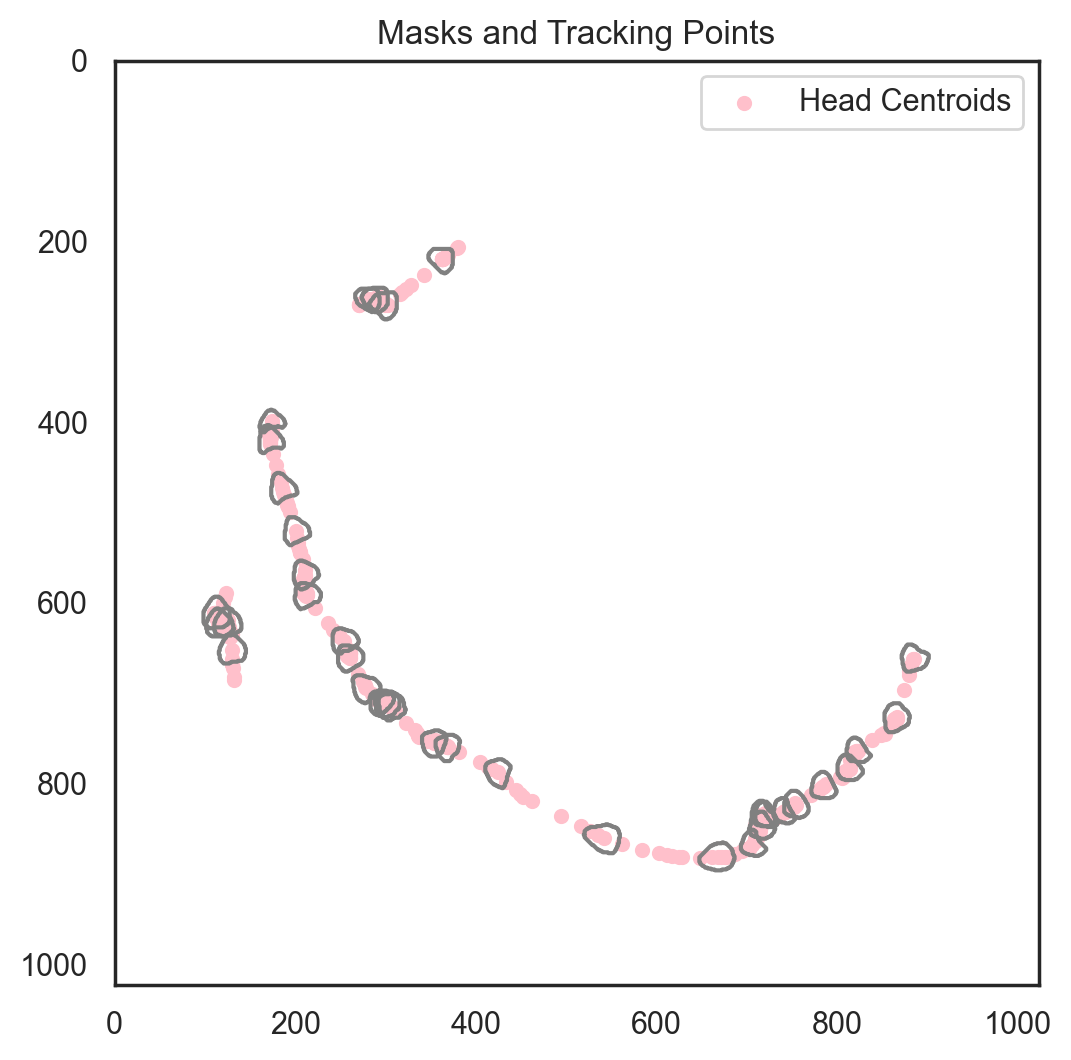

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

every_nth = 10
# Plot every nth mask
for frame_idx in head_indices[::every_nth]:
    mask = head_masks[frame_idx]
    if mask.any():
        ax.contour(mask, levels=[0.5], colors='grey', linewidths=1.5)

# Plot tracking points
ax.scatter(head_tracking['x'], 
           head_tracking['y'], 
           s=20, 
           color='pink', 
           label='Head Centroids'
           )

ax.set_title('Masks and Tracking Points')
ax.invert_yaxis() 
ax.set_aspect('equal')
plt.legend()
plt.show()

In [9]:
annotations

Annotations
1802 frames, 1024x1024